In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
seed = 72
np.random.seed(seed)


In [3]:
#creating random data
n = 10001
sim_ids = np.arange(n)
sim_df = pd.DataFrame(data=sim_ids,columns=['ids'] )
sim_df.head()

,ids
0,0
1,1
2,2
3,3
4,4


In [4]:
random_var1 = np.random.normal(0, 5, sim_ids.size)
random_var2 = np.random.normal(4, 2, sim_ids.size)
sim_df['var1'] = pd.Series(random_var1, index=sim_df.index)
sim_df['var2'] = pd.Series(random_var2, index=sim_df.index)
sim_df.head()


,ids,var1,var2
0,0,1.592727,6.352617
1,1,-3.397797,4.150112
2,2,-11.041942,0.986883
3,3,2.951201,4.509696
4,4,8.373830,-0.275511


In [6]:
# Getting a random sample from the population
n_samples = 400
samples_df = sim_df.sample(n_samples, random_state=seed)
samples_df

,ids,var1,var2
5519,5519,-0.185303,4.293282
3376,3376,-5.395099,4.435400
7084,7084,-3.399034,3.686634
337,337,10.393630,0.488468
1460,1460,5.346016,4.145204
...,...,...,...
9762,9762,-4.050332,2.861310
2911,2911,7.416019,6.850282
7697,7697,-5.898923,9.746999
3275,3275,-3.238256,2.133766


In [8]:
samples_df.describe()

,ids,var1,var2
count,400.000000,400.000000,400.000000
mean,4809.572500,0.078816,4.025288
std,2952.257218,5.160975,2.135192
min,4.000000,-14.520965,-2.252875
25%,2079.000000,-3.408441,2.576248
50%,4545.000000,0.304609,3.954455
75%,7541.750000,3.579033,5.508419
max,9962.000000,15.201024,10.264793


In [9]:
is_control = np.random.choice([0,1], size=n_samples)
samples_df = samples_df.assign(is_control=is_control)
samples_df.describe()


,ids,var1,var2,is_control
count,400.000000,400.000000,400.000000,400.000000
mean,4809.572500,0.078816,4.025288,0.527500
std,2952.257218,5.160975,2.135192,0.499868
min,4.000000,-14.520965,-2.252875,0.000000
25%,2079.000000,-3.408441,2.576248,0.000000
50%,4545.000000,0.304609,3.954455,1.000000
75%,7541.750000,3.579033,5.508419,1.000000
max,9962.000000,15.201024,10.264793,1.000000


/Users/chaitanyamedam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chaitanyamedam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='var1', ylabel='Density'>

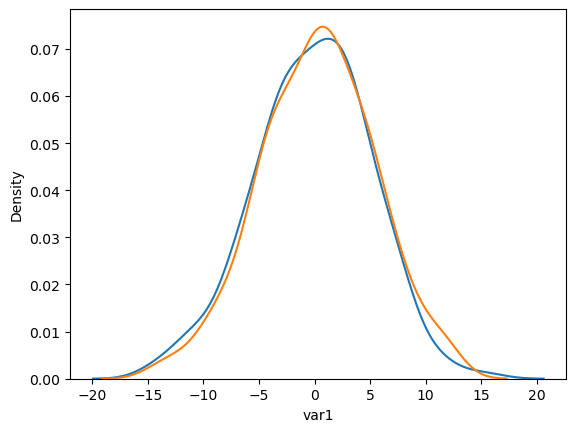

In [10]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var1)
sns.kdeplot(samples_df[samples_df.is_control == 1].var1)

/Users/chaitanyamedam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chaitanyamedam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='var2', ylabel='Density'>

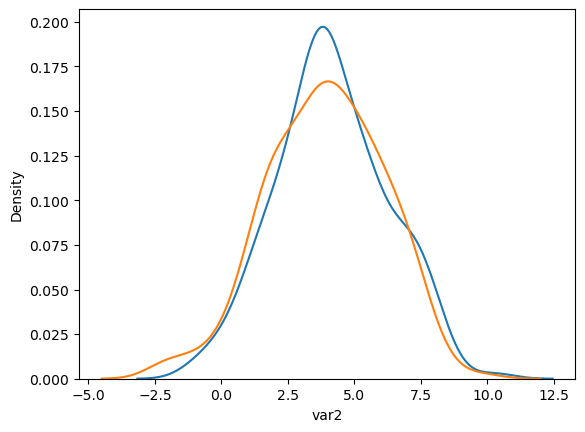

In [11]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var2)
sns.kdeplot(samples_df[samples_df.is_control == 1].var2)

/Users/chaitanyamedam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chaitanyamedam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='var1', ylabel='Density'>

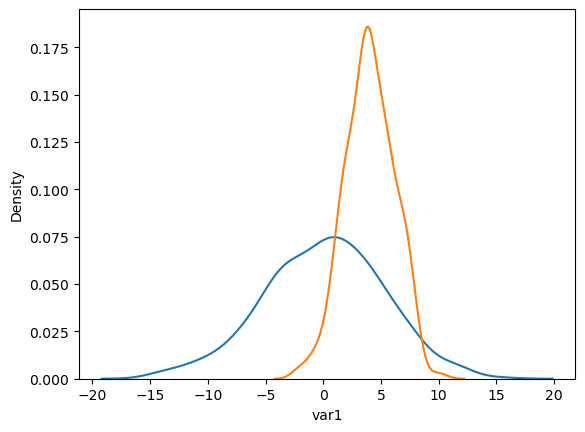

In [12]:
sns.kdeplot(samples_df.var1)
sns.kdeplot(samples_df.var2)

In [14]:
from scipy import stats

In [15]:
#Hypothesis testing
def is_significant(group1, group2, alpha=0.05):    
    t,p = stats.ttest_ind(group1,group2,equal_var=False)
    return p<alpha, p
def experiment_vs_control(df, var_name, alpha=0.05):
    #
    experiment = df[df.is_control == 0][var_name]
    control = df[df.is_control == 1][var_name]
    # 
    return is_significant(experiment, control, alpha)

In [16]:
experiment_vs_control(samples_df, 'var2')

(False, 0.2617697293720865)

In [17]:
is_significant(samples_df.var1,samples_df.var2)

(True, 1.0003249379634684e-38)